*Stock Price Prediction*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt

import yfinance as yf

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from pandas.plotting import scatter_matrix

import seaborn as sns

In [6]:
# download historical data
stock = "POWERGRID.NS"
start = dt.datetime(2007,10,5)
end = dt.datetime(2024,9,30)

df = yf.download(stock, start, end)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,31.243082,34.007133,25.823680,27.888954,855215656
2007-10-08,29.643665,32.299017,29.457324,32.299017,126671715
2007-10-09,31.662348,31.941858,28.059766,29.659187,116725709
2007-10-10,31.957388,32.609580,31.677878,32.485352,67931378
2007-10-11,35.528915,37.268094,31.677881,37.268094,106320954


In [7]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2024-09-23,325.527313,326.815497,324.668534,326.338394,6542941
2024-09-24,334.019745,334.926252,326.672377,328.771613,26145769
2024-09-25,347.092377,349.477891,336.214436,337.645745,40770462
2024-09-26,348.714539,349.334767,340.842340,347.378627,18733959
2024-09-27,338.027405,346.662956,337.168625,345.613353,33148043


In [8]:
df.columns.dtypes

,0
Price,object
Ticker,object


In [9]:
df.iloc[0]

,,2007-10-05
Price,Ticker,
Close,POWERGRID.NS,3.124308e+01
High,POWERGRID.NS,3.400713e+01
Low,POWERGRID.NS,2.582368e+01
Open,POWERGRID.NS,2.788895e+01
Volume,POWERGRID.NS,8.552157e+08


In [10]:
df.index

DatetimeIndex(['2007-10-05', '2007-10-08', '2007-10-09', '2007-10-10',
               '2007-10-11', '2007-10-12', '2007-10-15', '2007-10-16',
               '2007-10-17', '2007-10-18',
               ...
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-23', '2024-09-24', '2024-09-25',
               '2024-09-26', '2024-09-27'],
              dtype='datetime64[ns]', name='Date', length=4185, freq=None)

In [11]:
df.shape

(4185, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4185 entries, 2007-10-05 to 2024-09-27
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4185 non-null   float64
 1   (High, POWERGRID.NS)    4185 non-null   float64
 2   (Low, POWERGRID.NS)     4185 non-null   float64
 3   (Open, POWERGRID.NS)    4185 non-null   float64
 4   (Volume, POWERGRID.NS)  4185 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 196.2 KB


In [13]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [14]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4185.000000,4185.000000,4185.000000,4185.000000,4.185000e+03
mean,75.636997,76.619014,74.660546,75.667004,1.188125e+07
std,60.084904,60.777111,59.316358,60.043312,2.067323e+07
min,18.241362,19.499386,16.354325,19.405034,0.000000e+00
25%,35.043945,35.600924,34.504663,35.055090,4.784709e+06
50%,52.737919,53.528822,52.141161,52.848644,8.299919e+06
75%,79.508514,80.381138,78.590321,79.506454,1.360606e+07
max,348.714539,349.477891,340.842340,347.378627,8.552157e+08


In [15]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,31.243082,34.007133,25.823680,27.888954,855215656
1,2007-10-08,29.643665,32.299017,29.457324,32.299017,126671715
2,2007-10-09,31.662348,31.941858,28.059766,29.659187,116725709
3,2007-10-10,31.957388,32.609580,31.677878,32.485352,67931378
4,2007-10-11,35.528915,37.268094,31.677881,37.268094,106320954


In [16]:
df.shape

(4185, 6)

In [17]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [18]:
df.to_csv("powergrid.csv")
data_1 = pd.read_csv("powergrid.csv")
data_1.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,31.24308204650879,34.00713267881131,25.823680195046908,27.88895430157957,855215656
2,1,2007-10-08,29.643665313720703,32.299016913612114,29.457324037662747,32.299016913612114,126671715
3,2,2007-10-09,31.6623477935791,31.941857552495513,28.059765866603545,29.659186798723223,116725709
4,3,2007-10-10,31.957387924194336,32.60958020221288,31.677878151426185,32.4853519984062,67931378


In [19]:
data_1.tail()

,Price,Date,Close,High,Low,Open,Volume
4181,4180,2024-09-23,325.5273132324219,326.8154969275333,324.66853380903126,326.33839401231063,6542941
4182,4181,2024-09-24,334.0197448730469,334.9262520751169,326.6723773280453,328.7716127180237,26145769
4183,4182,2024-09-25,347.0923767089844,349.47789132554095,336.21443588149657,337.64574465143056,40770462
4184,4183,2024-09-26,348.71453857421875,349.33476655100753,340.84234033330716,347.37862709184105,18733959
4185,4184,2024-09-27,338.02740478515625,346.66295563058907,337.1686253888229,345.61335254620946,33148043


In [20]:
data_1.Date = pd.to_datetime(data_1.Date)

In [21]:
data_1.dtypes

,0
Price,object
Date,datetime64[ns]
Close,object
High,object
Low,object
Open,object
Volume,object


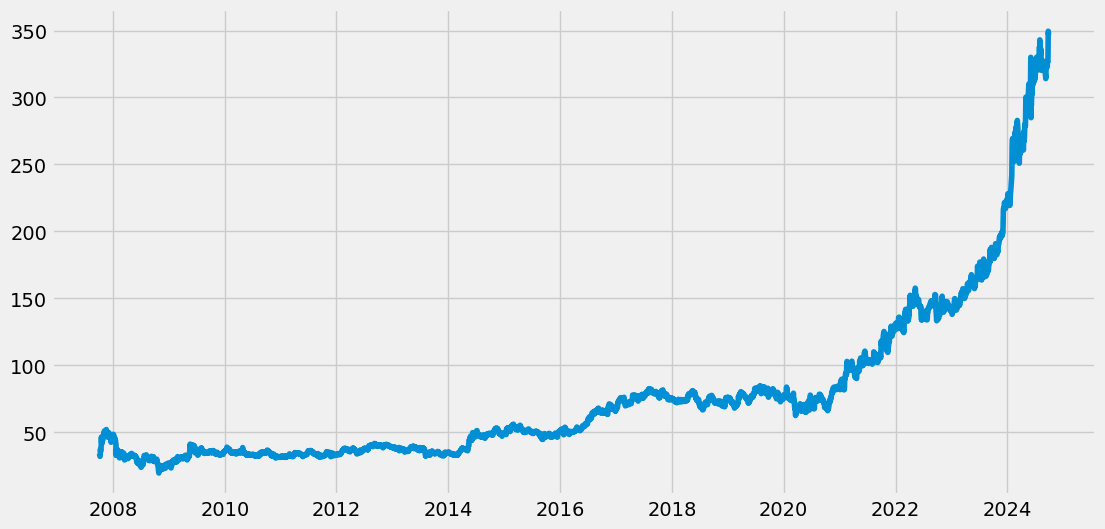

In [22]:
plt.figure(figsize = (12, 6))
plt.plot(df[('Date')], df[('High')])

**CANDLESTICKS**

In [24]:
fig = go.Figure(data=[go.Candlestick(x=data_1["Date"],
                open=data_1["Open"],
                high=data_1["High"],
                low=data_1["Low"],
                close =data_1["Close"])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [25]:
df = df.drop(["Date"], axis = 1)

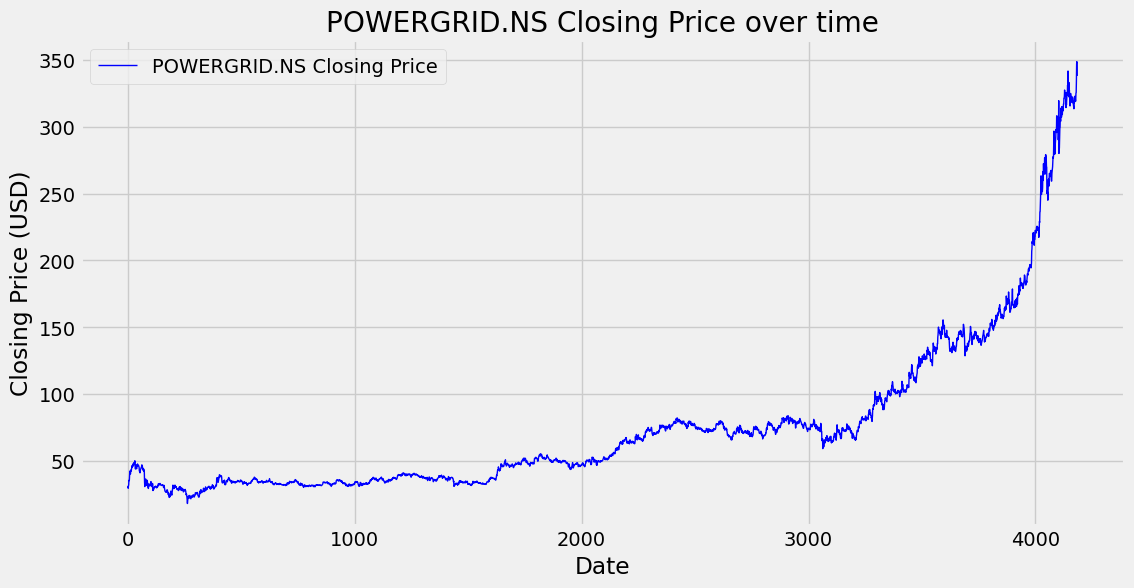

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(df["Close"], label = f"{stock} Closing Price", color = "blue", linewidth = 1)
plt.title(f"{stock} Closing Price over time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

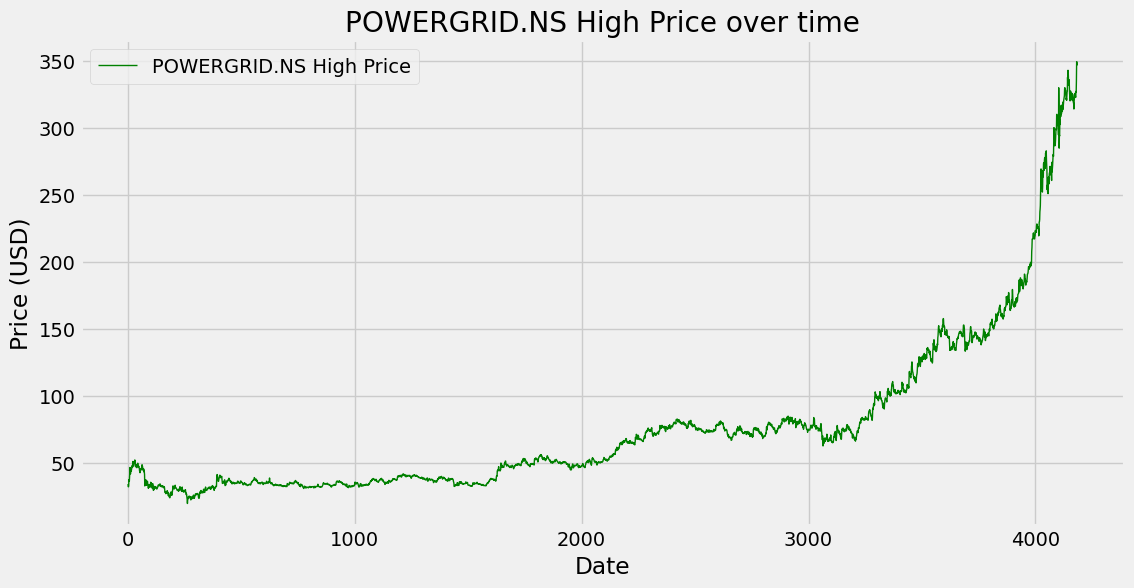

In [27]:
plt.figure(figsize = (12, 6))
plt.plot(df["High"], label = f"{stock} High Price", color = "green", linewidth = 1)
plt.title(f"{stock} High Price over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

**MOVING AVERAGE**

[10, 20, 30, 40, 50, 60, 70, 80, 90]
moving average for last 5 days -> null null null null 30.00 40.00 50.00

(5) -> (10 + 20 + 30 + 40 + 50) / 5

example begin

In [33]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]

#predict for the next day
#print(sum(temp_data[0:5])/5) -> 5th element
#print(sum(temp_data[1:6])/5) -> 6th element
#print(sum(temp_data[2:7])/5) -> 7th element
print(sum(temp_data[1:6])/5)


40.0


In [29]:
temp_data[-3:]

[70, 80, 90]

In [30]:
temp_data[5:]

[60, 70, 80, 90]

In [31]:
temp_data[:5]

[10, 20, 30, 40, 50]

In [32]:
temp_data[1:6]

[20, 30, 40, 50, 60]

In [34]:
df_example = pd.DataFrame(temp_data)
df_example

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


In [35]:
df_example.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


example end

In [36]:
ma_100 = df.Close.rolling(100).mean()
ma_100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4180,312.450715
4181,312.934392
4182,313.437602
4183,313.983057


In [37]:
ma_200 = df.Close.rolling(200).mean()
ma_200

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4180,278.662051
4181,279.359722
4182,280.116939
4183,280.869701


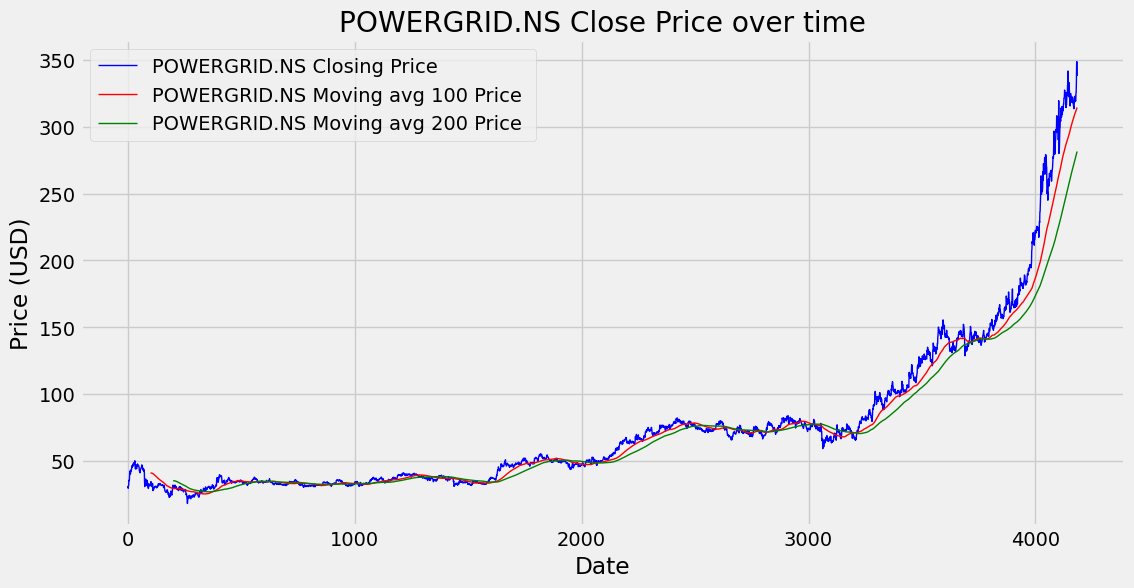

In [38]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f"{stock} Closing Price", color = "blue", linewidth = 1)
plt.plot(ma_100, label = f"{stock} Moving avg 100 Price ", color = "red", linewidth = 1)
plt.plot(ma_200, label = f"{stock} Moving avg 200 Price", color = "green", linewidth = 1)
plt.title(f"{stock} Close Price over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [ ]:
#Conclusion - there is a gap

In [39]:
#calculate exponential movin average
#span = 100, because this is the basic of the stock prices
#we don't need to take the adjustment
#ema_100 = df.Close.ewm(span=100, adjust=False, min_periods=12).mean()
ema_100 = df.Close.ewm(span=100, adjust=False).mean()

In [40]:
ema_200 = df.Close.ewm(span=200, adjust=False).mean()

In [41]:
#percentage change over data
df.pct_change()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,NaN,NaN,NaN,NaN,NaN
1,-0.051193,-0.050228,1.407098e-01,0.158129,-0.851883
2,0.068098,-0.011058,-4.744349e-02,-0.081731,-0.078518
3,0.009318,0.020904,1.289431e-01,0.095288,-0.418026
4,0.111759,0.142857,8.311719e-08,0.147228,0.565123
...,...,...,...,...,...
4180,0.000880,-0.001312,1.643028e-02,0.011386,-0.790533
4181,0.026088,0.024818,6.171967e-03,0.007456,2.996027
4182,0.039137,0.043447,2.920987e-02,0.026992,0.559352


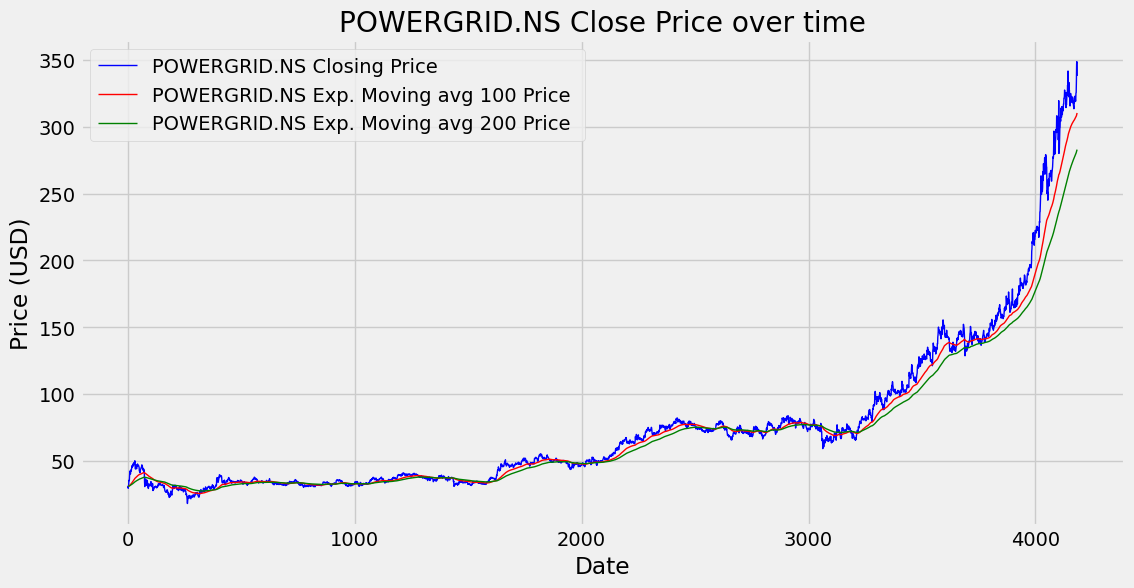

In [42]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f"{stock} Closing Price", color = "blue", linewidth = 1)
plt.plot(ema_100, label = f"{stock} Exp. Moving avg 100 Price ", color = "red", linewidth = 1)
plt.plot(ema_200, label = f"{stock} Exp. Moving avg 200 Price", color = "green", linewidth = 1)
plt.title(f"{stock} Close Price over time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [43]:
#Conclusion - can't predict future prices

**Predict next 30 days**

LSTM over RNN

LSTM - long shortterm memory, stores the data in its memory cell
RNN - low memory, can be overflow

In [44]:
#Training and testing

data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70): int(len(df))])

In [45]:
df.Close

Ticker,POWERGRID.NS
0,31.243082
1,29.643665
2,31.662348
3,31.957388
4,35.528915
...,...
4180,325.527313
4181,334.019745
4182,347.092377
4183,348.714539


In [46]:
data_training

Ticker,POWERGRID.NS
0,31.243082
1,29.643665
2,31.662348
3,31.957388
4,35.528915
...,...
2924,79.924995
2925,80.480316
2926,81.928070
2927,81.610756


In [47]:
data_testing

Ticker,POWERGRID.NS
2929,79.528343
2930,78.159897
2931,78.100395
2932,79.072197
2933,80.718292
...,...
4180,325.527313
4181,334.019745
4182,347.092377
4183,348.714539


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.19808605],
       [0.17371834],
       [0.20447372],
       ...,
       [0.97029072],
       [0.96545632],
       [0.95971504]])

In [50]:
data_training_array.shape

(2929, 1)

In [51]:
#features
x_train = []

#target
y_train = []

for i in range (100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

In [52]:
data_training_array[100]

array([0.23522933])

In [53]:
data_training_array[100, 0]

np.float64(0.23522933450817612)

In [55]:
len(x_train)

2829

In [57]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train, y_train

(array([[[0.19808605],
         [0.17371834],
         [0.20447372],
         ...,
         [0.20092505],
         [0.20494686],
         [0.2068396 ]],
 
        [[0.17371834],
         [0.20447372],
         [0.20896877],
         ...,
         [0.20494686],
         [0.2068396 ],
         [0.23522933]],
 
        [[0.20447372],
         [0.20896877],
         [0.26338232],
         ...,
         [0.2068396 ],
         [0.23522933],
         [0.2496607 ]],
 
        ...,
 
        [[0.90594838],
         [0.88982496],
         [0.91520407],
         ...,
         [0.94732701],
         [0.93977313],
         [0.94823365]],
 
        [[0.88982496],
         [0.91520407],
         [0.92207145],
         ...,
         [0.93977313],
         [0.94823365],
         [0.97029072]],
 
        [[0.91520407],
         [0.92207145],
         [0.9125168 ],
         ...,
         [0.94823365],
         [0.97029072],
         [0.96545632]]]),
 array([0.23522933, 0.2496607 , 0.24209009, ..., 0.9702

In [58]:
x_train.shape

(2829, 100, 1)

In [59]:
y_train.shape

(2829,)

**Model building**

In [60]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

batch_size - how many batches of the file is coming here

time_step - steps of the time, because LSTM is working as base of the time

seq_len - sequence length



LSTM input -> 3D array (batch_size, time_step, seq_len)

LSTM output -> 2D or 3D array, depending on the sequence

2D -> (batch_size, units)

3D -> (batch_size, time_step, units)

In [61]:
x_train.shape[1]

100

In [62]:
model = Sequential()
#input_shape declared only for the first neurons
model.add(LSTM(units = 50, activation = "relu", return_sequences = True, input_shape = (x_train.shape[1], 1)))

In [63]:
#20% from the neuron should be deactivated for the first time
model.add(Dropout(0.20))

In [64]:
model.add(LSTM(units = 60, activation = "relu", return_sequences = True))
model.add(Dropout(0.30))

In [65]:
model.add(LSTM(units = 80, activation = "relu", return_sequences = True))
model.add(Dropout(0.40))

In [66]:
#no return_sequences for the last one
model.add(LSTM(units = 120, activation = "relu"))
model.add(Dropout(0.50))

In [67]:
#unit is predicted value, last year
model.add(Dense(units = 1))

In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 32s 288ms/step - loss: 0.0865
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 0.0090
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - loss: 0.0074
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - loss: 0.0059
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - loss: 0.0066
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - loss: 0.0054
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 282ms/step - loss: 0.0053
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - loss: 0.0047
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - loss: 0.0045
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - loss: 0.0047
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - loss: 0.0052
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - loss: 0.0041
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 285ms/step - loss: 0.0036
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 286ms/step - loss: 0.0035
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [70]:
data_training

Ticker,POWERGRID.NS
0,31.243082
1,29.643665
2,31.662348
3,31.957388
4,35.528915
...,...
2924,79.924995
2925,80.480316
2926,81.928070
2927,81.610756


In [71]:
data_testing

Ticker,POWERGRID.NS
2929,79.528343
2930,78.159897
2931,78.100395
2932,79.072197
2933,80.718292
...,...
4180,325.527313
4181,334.019745
4182,347.092377
4183,348.714539


In [72]:
#test previous data - adding last 100 days of training data to the testing data

past_100_days = data_training.tail(100)
past_100_days

Ticker,POWERGRID.NS
2829,78.763115
2830,78.135979
2831,76.940521
2832,77.744041
2833,77.744041
...,...
2924,79.924995
2925,80.480316
2926,81.928070
2927,81.610756


In [103]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)
final_df.head()

Ticker,POWERGRID.NS
0,78.763115
1,78.135979
2,76.940521
3,77.744041
4,77.744041


In [104]:
final_df.tail()

Ticker,POWERGRID.NS
1351,325.527313
1352,334.019745
1353,347.092377
1354,348.714539
1355,338.027405


In [105]:
final_df.columns

Index(['POWERGRID.NS'], dtype='object', name='Ticker')

In [106]:
input_data = scaler.fit_transform(final_df)

In [107]:
#features
x_test = []

#target
y_test = []

for i in range (100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [108]:
x_test.shape

(1256, 100, 1)

In [109]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step


In [110]:
y_predicted.shape

(1256, 1)

In [111]:
scaler.scale_

array([0.00345503])

In [112]:
scale_factor = 1 / 0.00345503

In [113]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

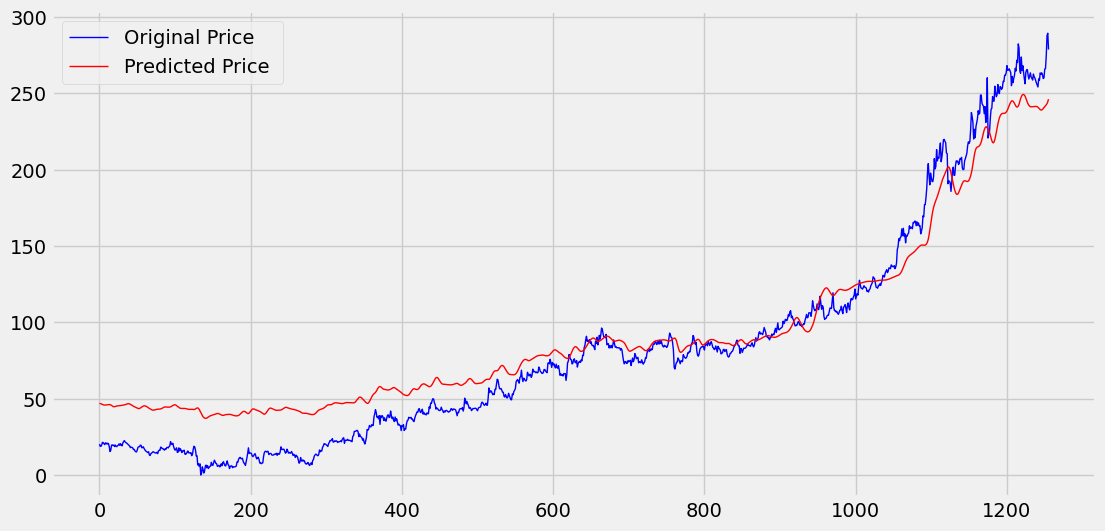

In [114]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, label = "Original Price", color = "blue", linewidth = 1)
plt.plot(y_predicted, label = "Predicted Price ", color = "red", linewidth = 1)
plt.legend()
plt.show()